# Análise de dados IPREM Set e Out/2023, Set e Out/2024

Análise de dados públicos do IPREM (Instituto de Previdência Municipal de São Paulo), “que trata-se do órgão gestor das aposentadorias de servidores públicos do Município de São Paulo vinculados ao RPPS-SP e das pensões de seus familiares, sendo responsável pela administração, manutenção e concessão dos benefícios, além do processamento de dados do regime de previdência” Os dados são referentes a uma amostra de 4 meses do pagamento de aposentadorias de ex-funcionários públicos de São Paulo, sendo Set e Out/2023 e Set e Out/2024. O intuito da análise é mensurar os valores pagos de aposentadoria dos ex servidores, de acordo com os cargos exercidos e o percentual de aumento no período estabelecido. 
Fonte: http://dados.prefeitura.sp.gov.br/pt_PT/dataset/folha-de-pagamento-pensionistas-e-inativos-iprem

In [4]:
#importando os pacotes necessários para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [5]:
#impostando base de dados 
data=r"C:\Users\thaii\Downloads\base_apos_iprem.csv"
data

'C:\\Users\\thaii\\Downloads\\base_apos_iprem.csv'

•	Resumo estatístico

•	Cargos com maiores e menores remunerações

•	Analisar mediana

•	Calcular e analisar desvio padrão

•	Identificar disparidades salariais entre funcionários de mesmo cargo

•	Distribuição das remunerações totais com gráfico de pontos

In [6]:
#carregando a base de dados, e ajustando 
#utilizando 'ISO-8859-1', e sep=';', para corrigir erros de formatação da base
df=pd.read_csv(data, encoding='ISO-8859-1', sep=';')

In [7]:
#visualização prévia da base de dados
df

,0,Cargo,Remu_Mes,Adc_Remu,Remu_Total,UNIDADE
0,ago/23,ASS ADM GEST I,"3.170,69",0,"3.170,69",APOSENTADOS IPREM
1,ago/23,ANA PLAN DESENV ORG IV,"18.021,49",0,"18.021,49",APOSENTADOS IPREM
2,ago/23,ASS ADM GEST I,"4.939,29",0,"4.939,29",APOSENTADOS IPREM
3,ago/23,ASS ADM GEST II,"6.673,29",0,"6.673,29",APOSENTADOS IPREM
4,ago/23,ASS ADM GEST II,"7.066,48",0,"7.066,48",APOSENTADOS IPREM
...,...,...,...,...,...,...
559,set/24,ASS ADM GEST I,"6.138,68",0,"6.138,68",APOSENTADOS IPREM
560,set/24,ASS ADM GEST I,"5.444,16","564,5","6.008,66",APOSENTADOS IPREM
561,set/24,ASS ADM GEST II,"6.159,83",0,"6.159,83",APOSENTADOS IPREM
562,set/24,ASS ADM GEST II,"7.097,05",0,"7.097,05",APOSENTADOS IPREM


In [8]:
#retirando a coluna Unidade, pois não é um dado relevante para a nossa analise
#axis para demonstrar que a ação deve ser feita na COLUNA indica
df=df.drop(['UNIDADE'], axis=1)

In [9]:
#renomenado coluna
df=df.rename(columns={'0': 'Data'})

In [10]:
#obtendo informações básicas sobre a base de dados
df_info=df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Data        564 non-null    object
 1   Cargo       564 non-null    object
 2   Remu_Mes    564 non-null    object
 3   Adc_Remu    564 non-null    object
 4   Remu_Total  564 non-null    object
dtypes: object(5)
memory usage: 22.2+ KB
None


In [11]:
#convertendo as colunas para o tipo correto para possibilitar a realização de cálculos e análises numéricas dos dados, 
#tranformando as object que contem numeros para float
#substituindo virgulas por pontos para o separador decimal e removendo pontos de milhar
df['Remu_Mes']=df['Remu_Mes'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Adc_Remu']=df['Adc_Remu'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
df['Remu_Total']=df['Remu_Total'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

In [12]:
#criando resumo estatistico dos dados
df_resumo=df.describe()
print(df_resumo)

           Remu_Mes      Adc_Remu    Remu_Total
count    564.000000    564.000000    564.000000
mean    8328.805922    118.330674   8447.136596
std     9635.195142    946.349619  10080.966168
min     1320.000000      0.000000   1320.000000
25%     3723.160000      0.000000   3728.147500
50%     4742.625000      0.000000   4780.960000
75%     7753.150000      0.000000   7753.150000
max    55511.430000  11737.090000  67248.520000


In [15]:
#cargos com maiores e menores remunerações
print(f"O cargo com menor remuneração é {df[df['Remu_Total']==df['Remu_Total'].min()]['Cargo'].iloc[0]} com {df['Remu_Total'].min()}")
print(f"O cargo com maior remuneração é {df[df['Remu_Total']==df['Remu_Total'].max()]['Cargo'].iloc[0]} com {df['Remu_Total'].max()}")

O cargo com menor remuneração é AUX AP ADM TEL com 1320.0
O cargo com maior remuneração é PROCUR MUNIC III com 67248.52


In [13]:
#mediana salarial por cargo
mediana_cargo=df.groupby('Cargo')['Remu_Total'].median().sort_values(ascending=True)
print(mediana_cargo)

Cargo
AUX AP ADM TEL                  1366.000
AUX DESENV INFAN                1498.265
ASS GEST POL PUBLI I            1936.545
ASS SUPOR OP                    2462.670
ASS SUPOR OP I                  2515.860
ASS ADM GEST                    3529.060
ASS SUPOR OP II                 3743.475
ASS TEC GEST I                  4192.640
ASS ADM GEST I                  4338.860
ASS TEC GEST II                 4443.990
ASS ADM GEST II                 6575.700
ANA SAUDE                       7871.060
CONTAD I                        9015.405
ANA ASSIS DESEN SOCIAL I        9492.600
ANA PLAN DESENV ORG I          10126.180
ANA SAUDE II                   10593.200
ANA INFO CULT DESPO I          11083.655
ANA PLAN DESENV ORG II         11414.470
ANA ASSIS DESEN SOCIAL III     14904.295
ANA PLAN DESENV ORG III        15371.780
ANA ASSIS DESEN SOCIAL IV      17323.220
ANA PLAN DESENV ORG IV         18216.120
PROF ENG, ARQ, AGRO,GEOL IV    25138.595
PROCUR MUNIC II                42062.620
PROCUR MUN

Ao analisarmos a mediana dos salários é possivel visualizar os cargos e seus salários médios de forma
crescente.

In [14]:
#calculando o desvio padrão
desvio_padrao_cargo=df.groupby('Cargo')['Remu_Total'].std().sort_values(ascending=True)
print(desvio_padrao_cargo)

Cargo
ANA ASSIS DESEN SOCIAL I          0.000000
ASS SUPOR OP                      0.000000
ASS GEST POL PUBLI I             40.720514
AUX DESENV INFAN                 52.771002
AUX AP ADM TEL                   53.116225
ASS TEC GEST II                  54.825182
ANA SAUDE                        97.110315
CONTAD I                        111.238076
ANA PLAN DESENV ORG I           124.927051
ANA INFO CULT DESPO I           136.745411
ANA ASSIS DESEN SOCIAL IV       213.723523
ANA PLAN DESENV ORG IV          224.739366
PROF ENG, ARQ, AGRO,GEOL IV     310.146791
ASS TEC GEST I                  322.297263
ASS ADM GEST                    351.629480
ASS SUPOR OP I                  474.192198
ASS SUPOR OP II                 650.207597
ANA ASSIS DESEN SOCIAL III      721.637421
ASS ADM GEST I                 1184.049911
ASS ADM GEST II                1222.672020
ANA PLAN DESENV ORG III        1622.627450
ANA SAUDE II                   1697.133382
ANA PLAN DESENV ORG II         2217.273479
PROCU

Ao analisarmos o desvio padrão dos salários é possivel visualizar que quanto maior o desvio padrão, maior
a variação dos salários. E isso ocorre com maior frequencia entre os cargos com maiores salários.

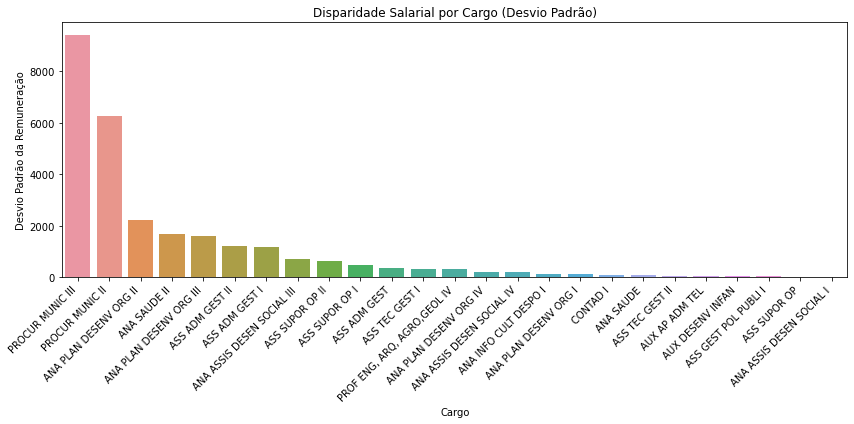

O cargo com menor disparidade é: ANA ASSIS DESEN SOCIAL I, com desvio padrão: 0.00
O cargo com maior disparidade é: PROCUR MUNIC III, com desvio padrão: 9434.77


In [29]:
#calcula o desvio padrão da remuneração total por cargo, para analisarmos as disparidades
dispar_cargo=df.groupby('Cargo')['Remu_Total'].std().sort_values(ascending=False)

#criando um gráfico de barras para visualizar a disparidade
plt.figure(figsize=(12, 6)) #define o tamanho da figura
sns.barplot(x=dispar_cargo.index, y=disparidade_cargo.values) #cria o gráfico de barras
plt.title('Disparidade Salarial por Cargo (Desvio Padrão)') #define o título do gráfico
plt.xlabel('Cargo') #define o rótulo do eixo x
plt.ylabel('Desvio Padrão da Remuneração') #define o rótulo do eixo y
plt.xticks(rotation=45, ha='right') #cria a escala numérica do eixo x
plt.tight_layout() #ajustando os parâmetros para evitar sobreposição
plt.show() #mostra o gráfico

#exibindo legenda com os cargos com menor e maior disparidade
print(f"O cargo com menor disparidade é: {dispar_cargo.index[-1]}, com desvio padrão: {dispar_cargo.values[-1]:.2f}")
print(f"O cargo com maior disparidade é: {dispar_cargo.index[0]}, com desvio padrão: {dispar_cargo.values[0]:.2f}")

Mais uma vez podemos notar que o maior nivel de disparidade está associado aos cargos com maiores remuneraçôes.

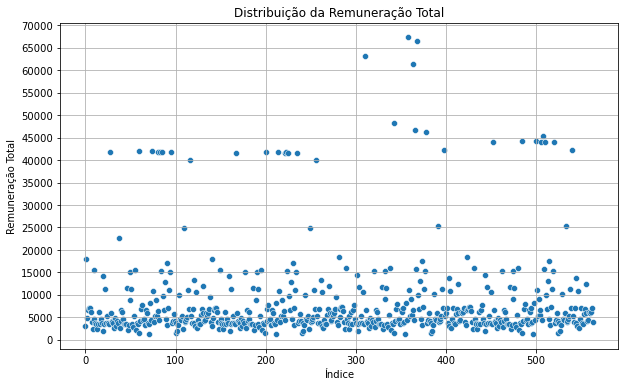

In [16]:
#plotando gráfico de pontos, que demonstra a distribuição da remuneração dos cargos
plt.figure(figsize=(10, 6))  #define o tamanho da figura
sns.scatterplot(x=df.index, y='Remu_Total', data=df)  #cria o gráfico de pontos
plt.title('Distribuição da Remuneração Total')  #define o título do gráfico
plt.xlabel('Índice')  #define o rótulo do eixo x
plt.ylabel('Remuneração Total')  #define o rótulo do eixo y
plt.grid(True)  #adiciona uma grade ao gráfico
plt.yticks(range(0, int(df['Remu_Total'].max()) + 5000, 5000)) #cria a escala numérica do eixo y
plt.show()  #mostra o gráfico

Ao analisar o gráfico é possivel notar que a maior parte dos pontos se concentra na faixa salarial de 5.000,00, o que significa que a maioria dos ex-servidores recebem essa faixa salárial. Também é possivel notar a baixa dispersão dos pontos.

2.	Tendências de Remuneração:

•	Analisar a variação em percentual da remuneração total de cada pensionista ao longo do tempo.

In [31]:
#criando um novo df, que mostra a REMUNERAÇÃO TOTAL x DATA
df_tendencias=df.groupby(['Data'])['Remu_Total'].sum().reset_index()

#criando um novo df que mostra a REMUNERAÇÃO TOTAL x CARGO x DATA
df_grouped=df.groupby(['Cargo', 'Data'])['Remu_Total'].sum().reset_index()

#classificando o df por cargo, e por data dentro de cada cargo
df_grouped=df_grouped.sort_values(['Cargo', 'Data'])

In [34]:
#calculando a variação % da remuneração total de cada cargo ao longo do tempo, e adicionando essa informação como uma nova coluna ao df
df_grouped['Variacao_Percentual']=df_grouped.groupby(['Cargo'])['Remu_Total'].pct_change()*100

#zerar NaN e números negativos na coluna 'Variacao_Percentual', pis os mesmos não fazem sentido para nossa análise
df_grouped['Variacao_Percentual'] = df_grouped['Variacao_Percentual'].fillna(0)  #substitui NaN por 0
df_grouped.loc[df_grouped['Variacao_Percentual'] < 0, 'Variacao_Percentual'] = 0  #substitui negativos por 0

df_grouped

,Cargo,Data,Remu_Total,Variacao_Percentual
0,ANA ASSIS DESEN SOCIAL I,ago/23,9492.60,0.000000
1,ANA ASSIS DESEN SOCIAL I,set/23,9492.60,0.000000
2,ANA ASSIS DESEN SOCIAL III,ago/23,29503.97,0.000000
3,ANA ASSIS DESEN SOCIAL III,ago/24,30141.24,2.159947
4,ANA ASSIS DESEN SOCIAL III,set/23,29503.97,0.000000
...,...,...,...,...
91,PROCUR MUNIC III,set/24,132386.66,5.650510
92,"PROF ENG, ARQ, AGRO,GEOL IV",ago/23,24870.00,0.000000
93,"PROF ENG, ARQ, AGRO,GEOL IV",ago/24,25407.19,2.159992
94,"PROF ENG, ARQ, AGRO,GEOL IV",set/23,24870.00,0.000000


In [39]:
#encontrando o maior e menor percentual de variação de cargos com  
cargo_maior_variacao=df_grouped.loc[df_grouped['Variacao_Percentual'].idxmax(),'Cargo']
maior_percentual=df_grouped['Variacao_Percentual'].max()

cargo_menor_variacao=df_grouped.loc[df_grouped['Variacao_Percentual'].idxmin(),'Cargo']
menor_percentual=df_grouped['Variacao_Percentual'].min()

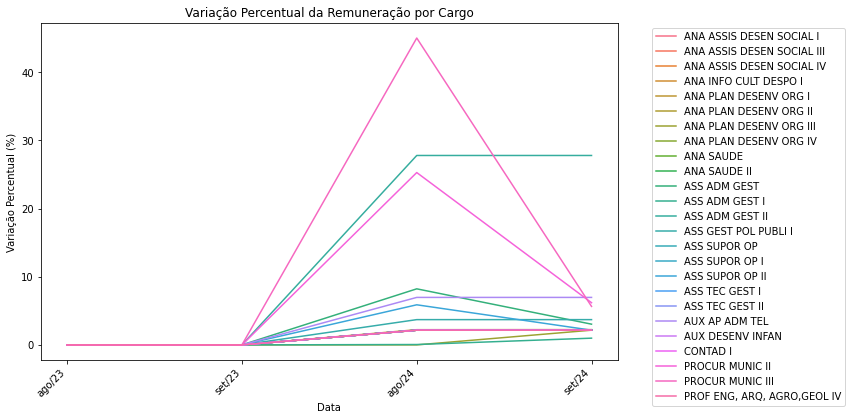

O cargo com maior percentual de variação a longo do tempo é: PROCUR MUNIC III com (45.04%)
O cargo com menor percentual de variação a longo do tempo é: ANA ASSIS DESEN SOCIAL I com (0.00%)


In [42]:
#plotando gráfico de linhas 
plt.figure(figsize=(12, 6))  #define o tamanho da figura
sns.lineplot(x='Data', y='Variacao_Percentual', hue='Cargo', data=df_grouped) #cria o gráfico de linhas
plt.title('Variação Percentual da Remuneração por Cargo') #define o título do gráfico
plt.xlabel('Data') #define o rótulo do eixo x
plt.ylabel('Variação Percentual (%)') #define o rótulo do eixo y
plt.xticks(rotation=45, ha='right') #rotaciona os rótulos do eixo x em 45° para melhor leitura
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') #define a posição da legenda, no canto superior esquerdo.
plt.tight_layout() #ajusta o layout para evitar sobreposições de elementos
plt.show() #exibe o gráfico gerado.

#exibindo legenda com os cargos com menor e maior percentual de variação
print(f'O cargo com maior percentual de variação a longo do tempo é: {cargo_maior_variacao} com ({maior_percentual:.2f}%)')
print(f'O cargo com menor percentual de variação a longo do tempo é: {cargo_menor_variacao} com ({menor_percentual:.2f}%)')